## AI-Powered System for Fruit Deduction and Quality Assessment

### Group -5 

#### Import Libraries

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/chris/Downloads/fruitClassification'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass



#### tensor flow libraries

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

### Loading and Preprocessing Data

#### Loaded and preprocessed the data using the ImageDataGenerator class.


#### Create an ImageDataGenerator object for the training dataset
#### The rescale argument rescales the pixel values from [0, 255] to [0, 1]

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


### Create a data generator for the training dataset
#### - flow_from_directory loads images from the specified directory
#### - target_size resizes all images to 224x224 pixels
#### - batch_size determines the number of images generated per batch
#### - class_mode='categorical' specifies that the labels are categorical (one-hot encoded)

In [18]:
train_generator = train_datagen.flow_from_directory("C:/Users/chris/Downloads/fruitClassification/train", target_size=(224, 224), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('C:/Users/chris/Downloads/fruitClassification/validation', target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('C:/Users/chris/Downloads/fruitClassification/test', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


#### Import necessary libraries and models for deep learning tasks, including InceptionV3, ResNet50, VGG16, DenseNet121, EfficientNetB0, and Xception, along with supporting modules for model creation, data preprocessing, and numerical computations.


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import Xception

#### Initialize the DenseNet121 model with pre-trained weights from ImageNet, excluding the top fully connected layers, and specifying an input shape of 224x224 pixels with 3 color channels.


In [20]:
base_model = DenseNet121(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

In [21]:
# Get the output of the base model
x = base_model.output

# Apply global average pooling to reduce the feature dimensions and retain only the most relevant features.
x = GlobalAveragePooling2D()(x)

# Add a dense layer with 512 units and ReLU activation for further processing of the pooled features.
x = Dense(512, activation='relu')(x)

# Add a final dense layer with 36 units and softmax activation to output probabilities for 36 different classes.
predictions = Dense(36, activation='softmax')(x)

In [22]:
# Create a Keras model by specifying the input from the base model and the output as the predictions layer, effectively combining the base model and the custom layers for classification.
model = Model(inputs=base_model.input, outputs=predictions)


In [23]:
# Set all layers in the base model to non-trainable, freezing their weights during training, so only the custom layers added on top will be trained.
for layer in base_model.layers:
    layer.trainable = False


In [24]:
# Compile the model with the Adam optimizer, using categorical crossentropy as the loss function for multi-class classification, and track accuracy as the performance metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Training the Model with Early Stopping

We trained the model using the training and validation data, and implement early stopping to avoid overfitting.


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback to monitor the validation accuracy, 
# stop training if there's no improvement for 5 epochs, 
# and restore the model weights from the epoch with the best validation accuracy.
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)


#### Train the model using the training data generator for 20 epochs, with the number of steps per epoch calculated based on the training samples and batch size. Use the validation data generator to evaluate the model at the end of each epoch, and apply the early stopping callback to halt training if the validation accuracy doesn't improve.

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping_callback])

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.4592 - loss: 2.0984 - val_accuracy: 0.8719 - val_loss: 0.4108
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8438 - loss: 0.5448 - val_accuracy: 0.9032 - val_loss: 0.3217
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.8545 - loss: 0.4989 - val_accuracy: 0.9281 - val_loss: 0.2316
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8750 - loss: 0.3833 - val_accuracy: 0.9355 - val_loss: 0.2446
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.8914 - loss: 0.3490 - val_accuracy: 0.9469 - val_loss: 0.1811
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8750 - loss: 0.2415 - val_accuracy: 0.8710 - val_loss: 0.2928
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9345 - loss: 0.2139 - val_accuracy: 0.9312 - val_loss: 0.2024
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8750 - loss: 0.3753 - val_accuracy: 0.9032 - v

5. Visualizing Training Results
We plotted the training and validation accuracy and loss to visualize the model's performance.

In [ ]:
# Extract the training accuracy and validation accuracy from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract the training loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine the range of epochs based on the length of the accuracy history
epochs_range = range(len(acc))


#### Plot training and validation accuracy over the epochs

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#### Plot training and validation loss over the epochs

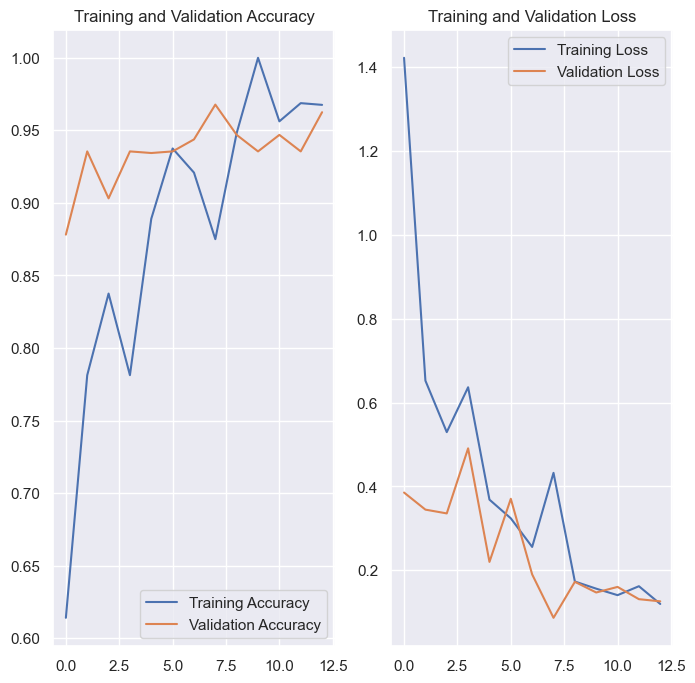

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plots
plt.show()



#### Evaluate the model using the validation data generator and obtain the loss and accuracy

In [ ]:

test_loss, test_acc = model.evaluate(valid_generator)

# Print the test accuracy
print('Test accuracy:', test_acc)


11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9371 - loss: 0.1787
Test accuracy: 0.945868968963623


#### Evaluate the model using the test data generator to determine the final loss and accuracy

In [ ]:

test_loss, test_acc = model.evaluate(test_generator)

# Print the test accuracy
print('Test accuracy:', test_acc)


 2/12 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9453 - loss: 0.1213       

In [ ]:
# Retrieve the class indices from the training data generator
class_names = train_generator.class_indices

# Extract the class names by obtaining the keys (class names) from the class_indices dictionary
class_names = list(class_names.keys())

# Print the list of class names
print(class_names)


['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


### Displaying Predictions on Test Images

In [ ]:
def plot_images_with_predictions(generator, model, class_names):
    # Set the size of the plot
    plt.figure(figsize=(20, 30))
    
    # Get the batch size from the generator
    batch_size = generator.batch_size
    # Set the total number of images to display (4 columns x 10 rows)
    num_images = 40
    # Calculate the number of full batches and the remainder
    num_batches = num_images // batch_size
    remainder = num_images % batch_size

    # Loop over the full batches of images
    for _ in range(num_batches):
        # Get the next batch of images and labels from the generator
        images, labels = next(generator)
        # Predict the labels using the model
        predictions = model.predict(images)
        # Loop over each image in the batch
        for i in range(batch_size):
            # Plot the image in a grid with 10 rows and 4 columns
            plt.subplot(10, 4, _ * batch_size + i + 1)
            # Display the image
            plt.imshow(images[i])
            # Remove the x and y ticks
            plt.xticks([])
            plt.yticks([])

            # Get the true and predicted labels
            true_label = np.argmax(labels[i])
            predicted_label = np.argmax(predictions[i])
            # Get the confidence of the prediction
            confidence = np.max(predictions[i])

            # Set the label color based on correctness
            if predicted_label == true_label:
                color = 'green'
            else:
                color = 'red'

            # Display the true and predicted labels with confidence
            plt.xlabel(f"{class_names[true_label]} \n {class_names[predicted_label]} ({confidence * 100:.2f}%)", color=color)

    # If there are leftover images not fitting into full batches
    if remainder > 0:
        # Get the next batch of images and labels
        images, labels = next(generator)
        # Predict the labels
        predictions = model.predict(images)
        # Loop over the leftover images
        for i in range(remainder):
            # Plot the image in the grid
            plt.subplot(10, 4, num_batches * batch_size + i + 1)
            plt.imshow(images[i])
            plt.xticks([])
            plt.yticks([])

            true_label = np.argmax(labels[i])
            predicted_label = np.argmax(predictions[i])
            confidence = np.max(predictions[i])

            if predicted_label == true_label:
                color = 'green'
            else:
                color = 'red'

            plt.xlabel(f"{class_names[true_label]} \n {class_names[predicted_label]} ({confidence * 100:.2f}%)", color=color)

# Get the class labels from the training generator
class_names = list(train_generator.class_indices.keys())

# Call the function to plot images with predictions
plot_images_with_predictions(test_generator, model, class_names)

# Adjust the spacing between subplots to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()
